In [1]:
"Import necessary packages"
from utils_traces import *

Finish loading the 3 LIS/LST cs from Traces data ...
Finish loading the 3 CLC/ cs from Traces data ...


In [2]:
"Obtain commune name for each commune code as dicctionary"
path = "Spectral_Indices_Dataset/COMMUNES.xlsx"
dictionary_communeName = nameCommune(path) # e.g., 'FR74001': 'Abondance',

"Add to our LIS_seasonaly_noot.csv their names "
df_name_GG_lis_monthly = add_communeName("Spectral_Indices_Dataset/GrandGeneve/LIS/LIS_monthly_noot.csv",dictionary_communeName)
df_name_GG_lst_monthly = add_communeName("Spectral_Indices_Dataset/GrandGeneve/LST/LST_monthly_noot.csv",dictionary_communeName)

df_name_Fr_lis_monthly = add_communeName("Spectral_Indices_Dataset/Fribourg/LIS/LIS_monthly_noot.csv",dictionary_communeName)
df_name_Fr_lst_monthly = add_communeName("Spectral_Indices_Dataset/Fribourg/LST/LST_monthly_noot.csv",dictionary_communeName)


df_name_Ev_lis_monthly = add_communeName("Spectral_Indices_Dataset/Evian/LIS/LIS_monthly_noot.csv",dictionary_communeName)
df_name_Ev_lst_monthly = add_communeName("Spectral_Indices_Dataset/Evian/LST/LST_monthly_noot.csv",dictionary_communeName)

print("Finish loading the 3 LIS/LST cs from Traces data ...")



Finish loading the 3 LIS/LST cs from Traces data ...


In [3]:
'Obtain the commune Time series of a commune and indice in Fribourg'
df = df_name_Fr_lst
selected_commune_index = select_commune_indice(df, "Crésuz", "st")
complete_true_dates = obtain_complete_dates(1985,2023) # complete_true_dates = obtain_complete_dates(1985,2023, is_Seasonal=True, season="summer")
'Complete current dataframe with NaNs the missing data'
print("Complete dates size in Season data: ",len(complete_true_dates))
print("Before adding NaN's", selected_commune_index.shape)
selected_commune_index = check_missing_data(selected_commune_index, complete_true_dates)
print("After adding NaN's", selected_commune_index.shape)
selected_commune_index.head()

Complete dates size in Season data:  152
Before adding NaN's (151, 10)
After adding NaN's (152, 10)


,id,tunit_code,date,season,var,qual,mean,std,commune_name,dtdate
0,1,CH2130,1985-01-15 00:00:00,DJF,st,1.0,-7.647530,3.031596,Crésuz,1985-01-15
1,2,CH2130,1985-04-15 00:00:00,MAM,st,1.0,9.043674,4.181774,Crésuz,1985-04-15
2,3,CH2130,1985-07-15 00:00:00,JJA,st,1.0,21.611610,2.625972,Crésuz,1985-07-15
3,4,CH2130,1985-10-15 00:00:00,SON,st,1.0,-2.621775,1.978764,Crésuz,1985-10-15
4,5,CH2130,1986-01-15 00:00:00,DJF,st,1.0,-14.264814,1.931020,Crésuz,1986-01-15


In [4]:
def obtain_complete_monthly_dates(init_year, end_year):
    complete_monthly_dates = []
    for year in range(init_year, end_year):
        for month in range(1, 13):  # January (1) to December (12)
            complete_monthly_dates.append(datetime.strptime(f"{year}-{month:02d}-15", "%Y-%m-%d").date())

    return complete_monthly_dates

'Obtain the commune Time series of a commune and indice in Evian'
df_monthly= df_name_Fr_lst_monthly
selected_commune_index_monthly = select_commune_indice(df_monthly, "Crésuz", "st") 
complete_true_dates_monthly = obtain_complete_monthly_dates(1985,2023) # complete_true_dates = obtain_complete_dates(1985,2023, is_Seasonal=True, season="summer")

'Complete current dataframe with NaNs the missing data'
print("Complete dates size in Season data: ",len(complete_true_dates_monthly))
print("Before adding NaN's", selected_commune_index_monthly.shape)
selected_commune_index_monthly = check_missing_data(selected_commune_index_monthly, complete_true_dates_monthly)
print("After adding NaN's", selected_commune_index_monthly.shape)
selected_commune_index.head()

Complete dates size in Season data:  456
Before adding NaN's (399, 10)
After adding NaN's (456, 10)


,id,tunit_code,date,season,var,qual,mean,std,commune_name,dtdate
0,1,CH2130,1985-01-15 00:00:00,DJF,st,1.0,-7.647530,3.031596,Crésuz,1985-01-15
1,2,CH2130,1985-04-15 00:00:00,MAM,st,1.0,9.043674,4.181774,Crésuz,1985-04-15
2,3,CH2130,1985-07-15 00:00:00,JJA,st,1.0,21.611610,2.625972,Crésuz,1985-07-15
3,4,CH2130,1985-10-15 00:00:00,SON,st,1.0,-2.621775,1.978764,Crésuz,1985-10-15
4,5,CH2130,1986-01-15 00:00:00,DJF,st,1.0,-14.264814,1.931020,Crésuz,1986-01-15


In [5]:
def plot_spectral_index_trend(df, plot_title, plot_missing_data=False, seasonal=True, name="Figure"):
    # Ensure the time column is in datetime format
    df["dtdate"] = pd.to_datetime(df["dtdate"])

    # Sort by time to maintain order
    df = df.sort_values(by="dtdate")

    # Detect missing values (NaN) in the "mean" column
    missing_dates = df[df["mean"].isna()]["dtdate"]

    # Extract metadata
    commune_name = df["commune_name"].iloc[0]
    variable_name = df["var"].iloc[0]

    # Define color scheme
    main_color = "#e6550d"  # Dark orange for temperature-related data
    marker_color = "black"  # High contrast markers

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 6))

    # Plot trend line with gaps (line breaks at missing values)
    ax.plot(df["dtdate"], df["mean"], color=main_color, linewidth=2.5, linestyle="-", marker="o", markerfacecolor="white", label="Surface Temperature Time Series")

    # Plot subtle vertical dashed lines for missing data
    if plot_missing_data:
        for date in missing_dates:
            ax.axvline(date, color="black", linestyle="dashed", alpha=0.6, linewidth=1, 
                       label="Missing Data" if date == missing_dates.iloc[0] else "")

    # Adjust x-axis labels for seasonal data
    if seasonal and "season" in df.columns:
        df["year_season"] = df["dtdate"].dt.year.astype(str) + "-" + df["season"]
        unique_seasons = df.groupby("dtdate")["year_season"].first()
        
        # Show labels at evenly spaced intervals to avoid overlap
        interval = max(1, len(unique_seasons) // 10)  # Adjust interval dynamically
        season_labels = unique_seasons.iloc[::interval]

        ax.set_xticks(season_labels.index)
        ax.set_xticklabels(season_labels.values, rotation=45, fontsize=10)

    #else:
        #ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        #ax.xaxis.set_major_locator(mdates.YearLocator())

    # Labels and formatting
    ax.set_xlabel("Time", fontsize=12, fontweight="bold")
    ax.set_ylabel(f"{variable_name} (°C)", fontsize=13, fontweight="bold", fontname="Arial")

    # Highlight max and min points with shifted markers
    if not df["mean"].isna().all():
        max_idx = df["mean"].idxmax()
        min_idx = df["mean"].idxmin()

        max_shift = pd.Timedelta(days=15)  # Shift markers slightly to the right
        min_shift = pd.Timedelta(days=15)

        ax.scatter(df.loc[max_idx, "dtdate"] + max_shift, df.loc[max_idx, "mean"], color="red", s=100, marker="^", label="Highest Temp")
        ax.scatter(df.loc[min_idx, "dtdate"] + min_shift, df.loc[min_idx, "mean"], color="blue", s=100, marker="v", label="Lowest Temp")

        # Annotate max and min values, slightly shifted to avoid overlap
        ax.text(df.loc[max_idx, "dtdate"] + max_shift, df.loc[max_idx, "mean"] + 0.7, f"Max: {df.loc[max_idx, 'mean']:.1f}", 
                fontsize=11, ha="left", color="red", fontweight="bold")
        ax.text(df.loc[min_idx, "dtdate"] + min_shift, df.loc[min_idx, "mean"] - 0.7, f"Min: {df.loc[min_idx, 'mean']:.1f}", 
                fontsize=11, ha="left", color="blue", fontweight="bold")

    # Enhance grid appearance
    ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)

    # Add a clean legend
    ax.legend(loc="upper left", bbox_to_anchor=(0, 1.01), fontsize=11, frameon=False)

    # Improve axis appearance
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(1.2)
    ax.spines["bottom"].set_linewidth(1.2)

    # Save the figure with high resolution
    file_path = os.path.join("Figures", f"{name}.png")
    plt.savefig(file_path, dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

# Plot "Surface Temperature Time Series for Crésuz Municipality"

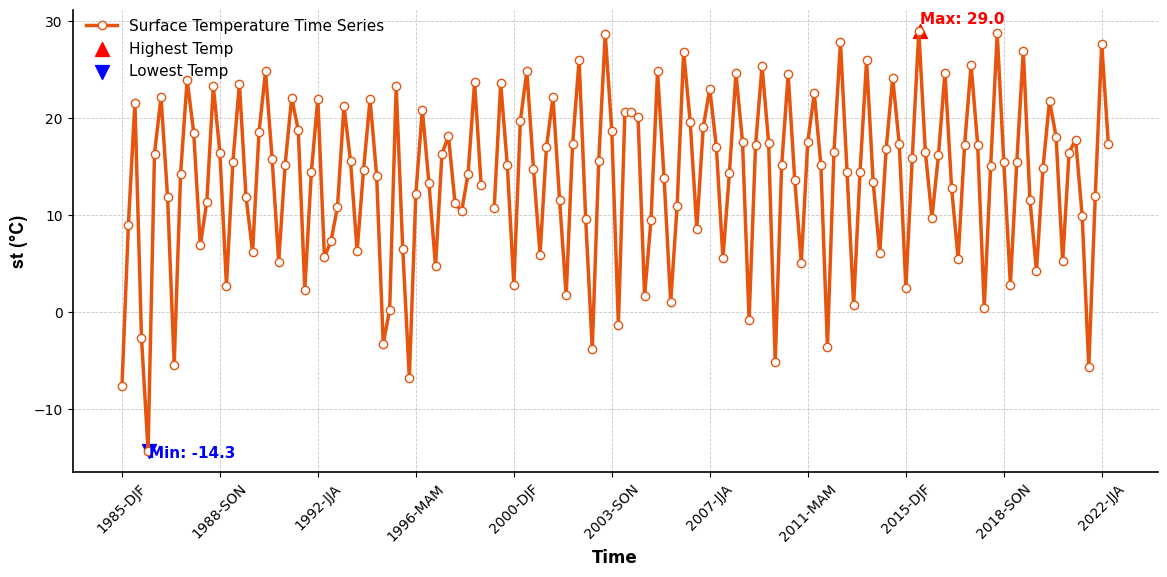

In [6]:
plot_spectral_index_trend(selected_commune_index, plot_title="Surface Temperature Time Series for Crésuz Municipality, France (Seasonal Scale)", seasonal=True, name="results-data-st-trend")


# Plot "NDVI and NDSIS for Crésuz Municipality"

In [7]:
'Obtain the commune Time series of a commune and indice in Evian'
complete_true_dates = obtain_complete_dates(1985,2023) # complete_true_dates = obtain_complete_dates(1985,2023, is_Seasonal=True, season="summer")
df = df_name_Fr_lis
selected_commune_index_NDVI = select_commune_indice(df, "Crésuz", "NDVI")
'Complete current dataframe with NaNs the missing data'
print("Complete dates size in Season data: ",len(complete_true_dates))
print("Before adding NaN's", selected_commune_index_NDVI.shape)
selected_commune_index_NDVI = check_missing_data(selected_commune_index_NDVI, complete_true_dates)
print("After adding NaN's", selected_commune_index_NDVI.shape)
selected_commune_index_NDVI.head()

#---
selected_commune_index_NDSI = select_commune_indice(df, "Crésuz", "NDSI")
'Complete current dataframe with NaNs the missing data'
print("Complete dates size in Season data: ",len(complete_true_dates))
print("Before adding NaN's", selected_commune_index_NDSI.shape)
selected_commune_index_NDSI = check_missing_data(selected_commune_index_NDSI, complete_true_dates)
print("After adding NaN's", selected_commune_index_NDSI.shape)
selected_commune_index_NDSI.head()



Complete dates size in Season data:  152
Before adding NaN's (151, 10)
After adding NaN's (152, 10)
Complete dates size in Season data:  152
Before adding NaN's (151, 10)
After adding NaN's (152, 10)


,id,tunit_code,date,season,var,qual,mean,std,commune_name,dtdate
0,1,CH2130,1985-01-15 00:00:00,DJF,NDSI,0.964322,0.296952,0.399500,Crésuz,1985-01-15
1,2,CH2130,1985-04-15 00:00:00,MAM,NDSI,1.000000,0.120280,0.186963,Crésuz,1985-04-15
2,3,CH2130,1985-07-15 00:00:00,JJA,NDSI,1.000000,-0.381755,0.264378,Crésuz,1985-07-15
3,4,CH2130,1985-10-15 00:00:00,SON,NDSI,0.849246,0.586742,0.190176,Crésuz,1985-10-15
4,5,CH2130,1986-01-15 00:00:00,DJF,NDSI,1.000000,0.457121,0.089998,Crésuz,1986-01-15


In [8]:
def plot_multiple_spectral_index_trends(df_list, index_labels, plot_title, name="Figure",seasonal=True):

    # Define color palette for multiple indices
    colors = ["#2ca02c","#1f77b4", "#ff7f0e", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
    
    # Ensure the number of colors matches the number of indices
    num_colors = len(colors)
    num_indices = len(df_list)
    
    if num_indices > num_colors:
        raise ValueError("Too many indices for the predefined color set. Add more colors to the list.")

    # Ensure time columns are in datetime format and sort by time for each dataframe
    for df in df_list:
        df["dtdate"] = pd.to_datetime(df["dtdate"])
        df.sort_values(by="dtdate", inplace=True)

    # Extract the commune name (assuming it's the same across all dataframes)
    commune_name = df_list[0]["commune_name"].iloc[0]

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Adjust x-axis labels for seasonal data
    if seasonal and "season" in df.columns:
        df["year_season"] = df["dtdate"].dt.year.astype(str) + "-" + df["season"]
        unique_seasons = df.groupby("dtdate")["year_season"].first()
        
        # Show labels at evenly spaced intervals to avoid overlap
        interval = max(1, len(unique_seasons) // 10)  # Adjust interval dynamically
        season_labels = unique_seasons.iloc[::interval]

        ax.set_xticks(season_labels.index)
        ax.set_xticklabels(season_labels.values, rotation=45, fontsize=10)


    # Plot each trend
    for i, df in enumerate(df_list):
        ax.plot(df["dtdate"], df["mean"], linestyle="-", marker="o", label=index_labels[i], 
                color=colors[i], alpha=0.8, markerfacecolor="white", linewidth=2.5)
    # Labels and formatting
    ax.set_xlabel("Time", fontsize=12, fontweight="bold")
    ax.set_ylabel("Index Value", fontsize=12, fontweight="bold")
    #ax.set_title(f"{plot_title} - {commune_name}", fontsize=14, fontweight="bold")

    # Enhance grid appearance
    ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=10)

    # Add a clean legend
    legend = ax.legend(loc="upper right", fontsize=12, frameon=True, edgecolor="#333333")
    for text in legend.get_texts():
        text.set_color("#333333")

    # Improve axis appearance
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(1.2)
    ax.spines["bottom"].set_linewidth(1.2)

    # Add subtle background color to improve contrast
    ax.set_facecolor("#F8F8F8")
    fig.patch.set_facecolor("white")

    # Ensure the "Plots" directory exists
    output_dir = "Figures"
    os.makedirs(output_dir, exist_ok=True)

    # Save the figure with high resolution
    file_path = os.path.join(output_dir, f"{name}.png")
    plt.savefig(file_path, dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

    # Print min and max values
    for i, df in enumerate(df_list):
        max_idx = df["mean"].idxmax()
        min_idx = df["mean"].idxmin()
        max_value = df.loc[max_idx, ["dtdate", "mean"]]
        min_value = df.loc[min_idx, ["dtdate", "mean"]]
        print(f"\n{index_labels[i]} Maximum Value:\nDate: {max_value['dtdate'].strftime('%Y-%m-%d')}, Value: {max_value['mean']:.1f}")
        print(f"{index_labels[i]} Minimum Value:\nDate: {min_value['dtdate'].strftime('%Y-%m-%d')}, Value: {min_value['mean']:.1f}")

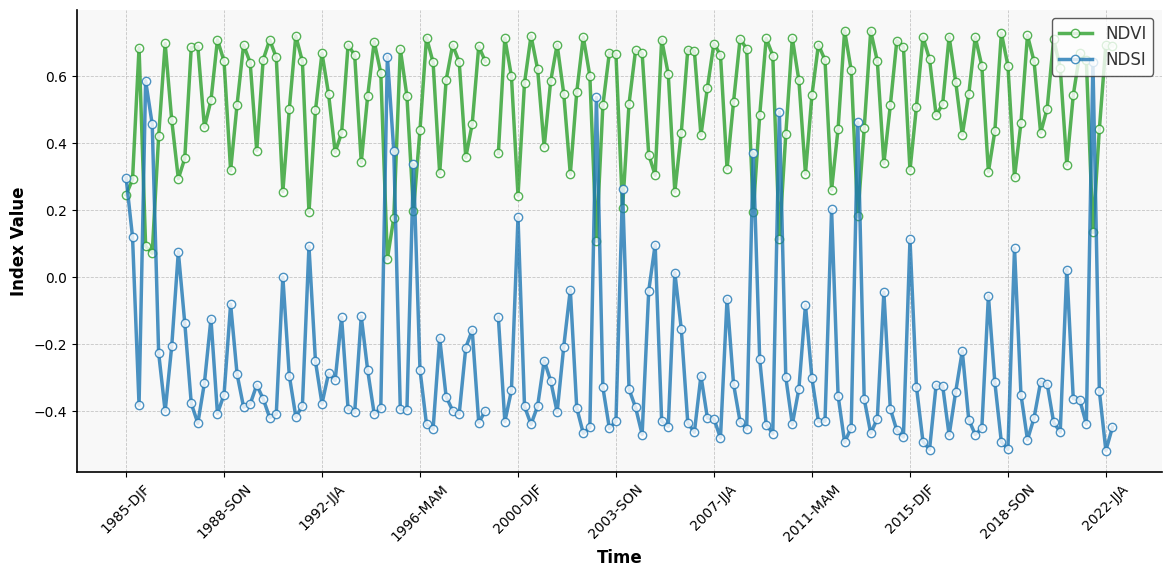


NDVI Maximum Value:
Date: 2012-07-15, Value: 0.7
NDVI Minimum Value:
Date: 1995-01-15, Value: 0.1

NDSI Maximum Value:
Date: 1995-01-15, Value: 0.7
NDSI Minimum Value:
Date: 2022-07-15, Value: -0.5


In [9]:
plot_multiple_spectral_index_trends([selected_commune_index_NDVI, selected_commune_index_NDSI], ["NDVI", "NDSI"], "LIS indices correlation for Crésuz Municipality, France (Monthly Scale)",name="results_data_lis-correaltion")


# Before the filter and after the files at the monthly level

In [10]:
#---
#df_lis = df_name_Fr_lis_monthly
#selected_commune_index_NDVI_monthly = select_commune_indice(df_lis, "Crésuz", "NDVI")
df_lis = df_name_GG_lis_monthly
selected_commune_index_NDVI_monthly = select_commune_indice(df_lis, "Meyrin", "NDVI")

'Complete current dataframe with NaNs the missing data'
print("Complete dates size in Season data: ",len(complete_true_dates_monthly))
print("Before adding NaN's", selected_commune_index_NDVI_monthly.shape)
selected_commune_index_NDVI_monthly = check_missing_data(selected_commune_index_NDVI_monthly, complete_true_dates_monthly)
print("After adding NaN's", selected_commune_index_NDVI_monthly.shape)

#---
#df_lis_season = df_name_Fr_lis
#selected_commune_index_NDVI_season = select_commune_indice(df_lis_season, "Crésuz", "NDVI")
df_lis_season = df_name_GG_lis
selected_commune_index_NDVI_season = select_commune_indice(df_lis_season, "Meyrin", "NDVI")
'Complete current dataframe with NaNs the missing data'
print("Complete dates size in Season data: ",len(complete_true_dates))
print("Before adding NaN's", selected_commune_index_NDVI_season.shape)
selected_commune_index_NDVI_season = check_missing_data(selected_commune_index_NDVI_season, complete_true_dates)
print("After adding NaN's", selected_commune_index_NDVI_season.shape)
selected_commune_index_NDVI_season.head()


Complete dates size in Season data:  456
Before adding NaN's (327, 10)
After adding NaN's (456, 10)
Complete dates size in Season data:  152
Before adding NaN's (146, 10)
After adding NaN's (152, 10)


,id,tunit_code,date,season,var,qual,mean,std,commune_name,dtdate
0,1,CH6630,1985-01-15 00:00:00,DJF,NDVI,0.782617,-0.055229,0.041296,Meyrin,1985-01-15
1,2,CH6630,1985-04-15 00:00:00,MAM,NDVI,0.446627,0.349818,0.176104,Meyrin,1985-04-15
2,3,CH6630,1985-07-15 00:00:00,JJA,NDVI,0.999638,0.456702,0.190588,Meyrin,1985-07-15
148,4,CH6630,1985-10-15,NaN,NaN,NaN,NaN,NaN,Meyrin,1985-10-15
3,5,CH6630,1986-01-15 00:00:00,DJF,NDVI,0.900951,0.000817,0.032070,Meyrin,1986-01-15


In [11]:
def plot_missing_data_heatmap(df, time_scale="monthly",name="Figure"):
    """
    Plots a heatmap to visualize missing data for either seasonal or monthly scales.

    Parameters:
    - df (pd.DataFrame): The dataset containing the time series.
    - time_scale (str): Either "monthly" or "seasonal" to define the x-axis format.

    Assumes the dataframe contains:
      * 'dtdate': The time column (datetime format).
      * 'mean': The index values (missing values indicate missing data).
      * 'season' (if seasonal): The seasonal category (DJF, MAM, JJA, SON).
    """

    # Convert 'dtdate' to datetime format if not already
    df["dtdate"] = pd.to_datetime(df["dtdate"])
    
    # Extract year and time category based on the selected time scale
    df["Year"] = df["dtdate"].dt.year
    
    if time_scale == "monthly":
        df["Time"] = df["dtdate"].dt.strftime('%b')  # Month names
        time_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        x_label = "Month"
    elif time_scale == "seasonal":
        df["Time"] = df["season"]  # Use directly the seasonal labels (DJF, MAM, JJA, SON)
        time_labels = ["DJF", "MAM", "JJA", "SON"]
        x_label = "Season"
    else:
        raise ValueError("Invalid time_scale. Choose either 'monthly' or 'seasonal'.")

    # Create a full range of expected years and time categories
    all_years = sorted(df["Year"].unique())
    all_times = time_labels  # Ensure fixed order of months/seasons

    # Pivot table to create a matrix format for the heatmap
    heatmap_data = df.pivot_table(index="Year", columns="Time", values="mean", aggfunc="mean")



    # Create the heatmap
    plt.figure(figsize=(14, 8))

    sns.set_style("white",  {'figure.facecolor': 'white'})

    sns.heatmap(
        heatmap_data, 
         cmap='YlGn', 
         annot=True,  # Annotate with NDVI values
         fmt=".2f",   # Format values to two decimals
         cbar_kws={'label': 'NDVI'}
    )

    

    # Labels and title
    plt.xlabel(x_label, fontsize=12, fontweight="bold")
    plt.ylabel("Year", fontsize=12, fontweight="bold")
    #plt.title(f"NDVI Heatmap for Crésuz Municipality, Switzerland ({time_scale.capitalize()} Scale)", fontsize=14, fontweight="bold") 

    # Set x-axis labels for months or seasons
    plt.xticks(ticks=range(len(time_labels)), labels=time_labels, rotation=45)

    plt.tight_layout()
    
     # Save the figure with high resolution
    file_path = os.path.join("Figures/ "+name+".png")
    plt.savefig(file_path, dpi=300, bbox_inches="tight")
    plt.show()



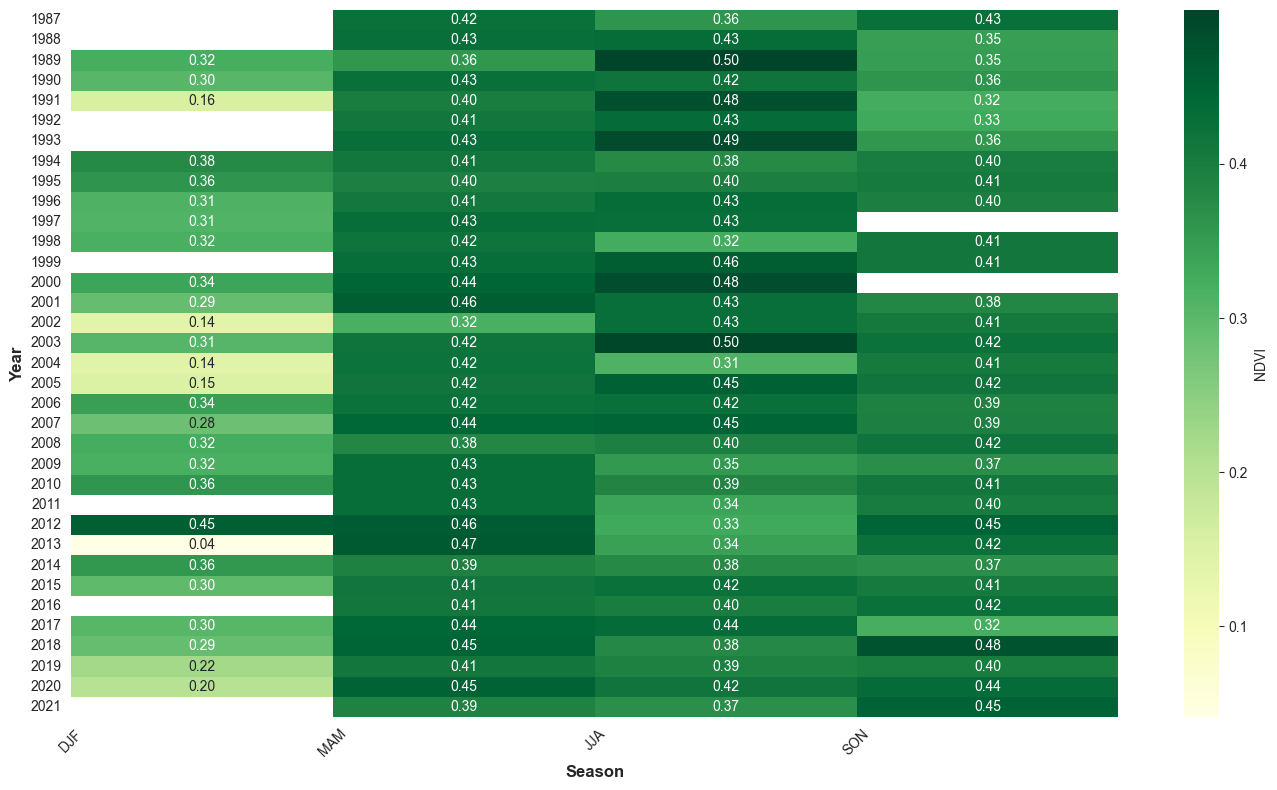

In [12]:
# Convert to datetime format if not already
selected_commune_index_NDVI_season["dtdate"] = pd.to_datetime(selected_commune_index["dtdate"], errors="coerce")

# Set values before 1987 to NaN
selected_commune_index_NDVI_season.loc[selected_commune_index_NDVI_season["dtdate"].dt.year < 1987, ["mean", "qual"]] = np.nan 

# Apply filtering conditions
selected_commune_index_NDVI_season_filtered = selected_commune_index_NDVI_season[
    ((selected_commune_index_NDVI_season["dtdate"].dt.year < 2003) & 
     (selected_commune_index_NDVI_season["qual"] >= 0.8)) |
    ((selected_commune_index_NDVI_season["dtdate"].dt.year >= 2003) & 
     (selected_commune_index_NDVI_season["qual"] >= 0.6))
]


#selected_commune_index_NDVI_season_filtered = selected_commune_index_NDVI_season[selected_commune_index_NDVI_season["qual"] >= 0.8]
plot_missing_data_heatmap(selected_commune_index_NDVI_season_filtered, time_scale="seasonal",name="results_data_heatmap_seasonaly_NDVI_filtered")

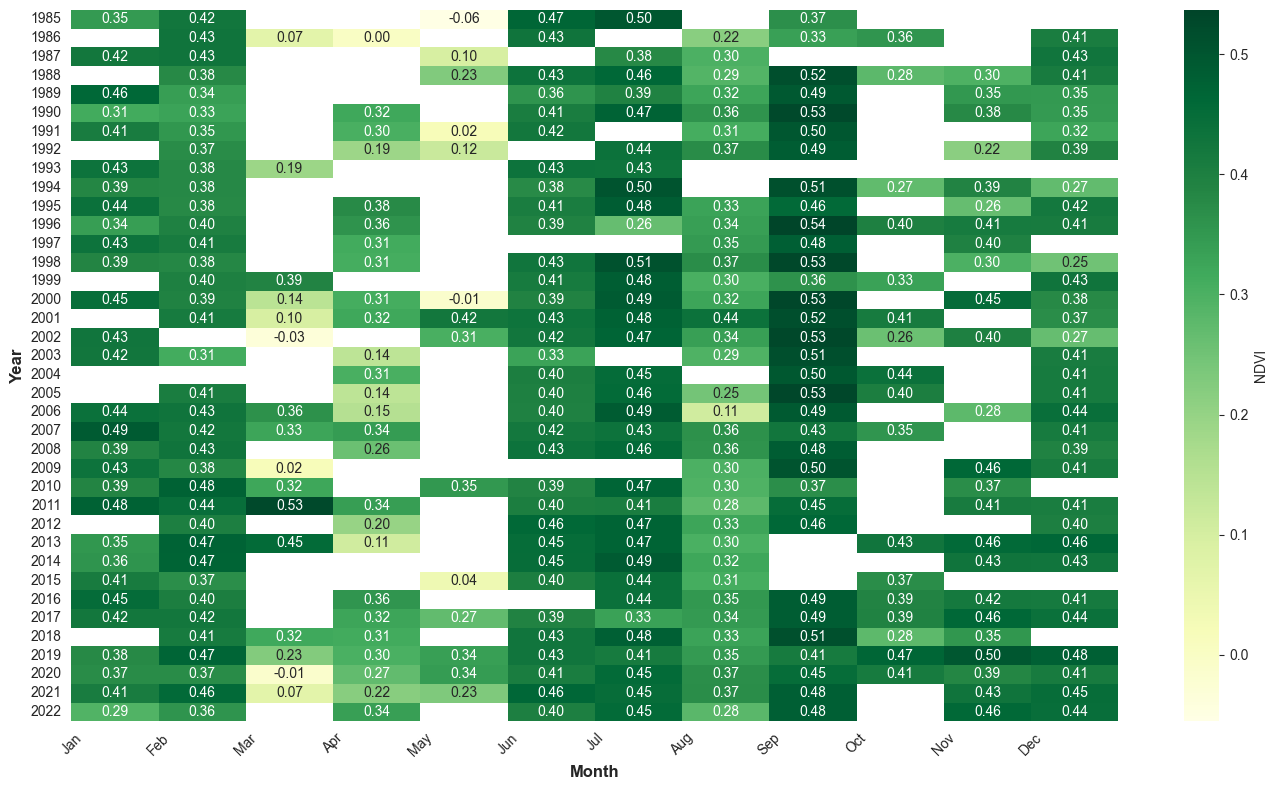

In [13]:
plot_missing_data_heatmap(selected_commune_index_NDVI_monthly, time_scale="monthly",name="results_data_heatmap_monthly_NDVI")

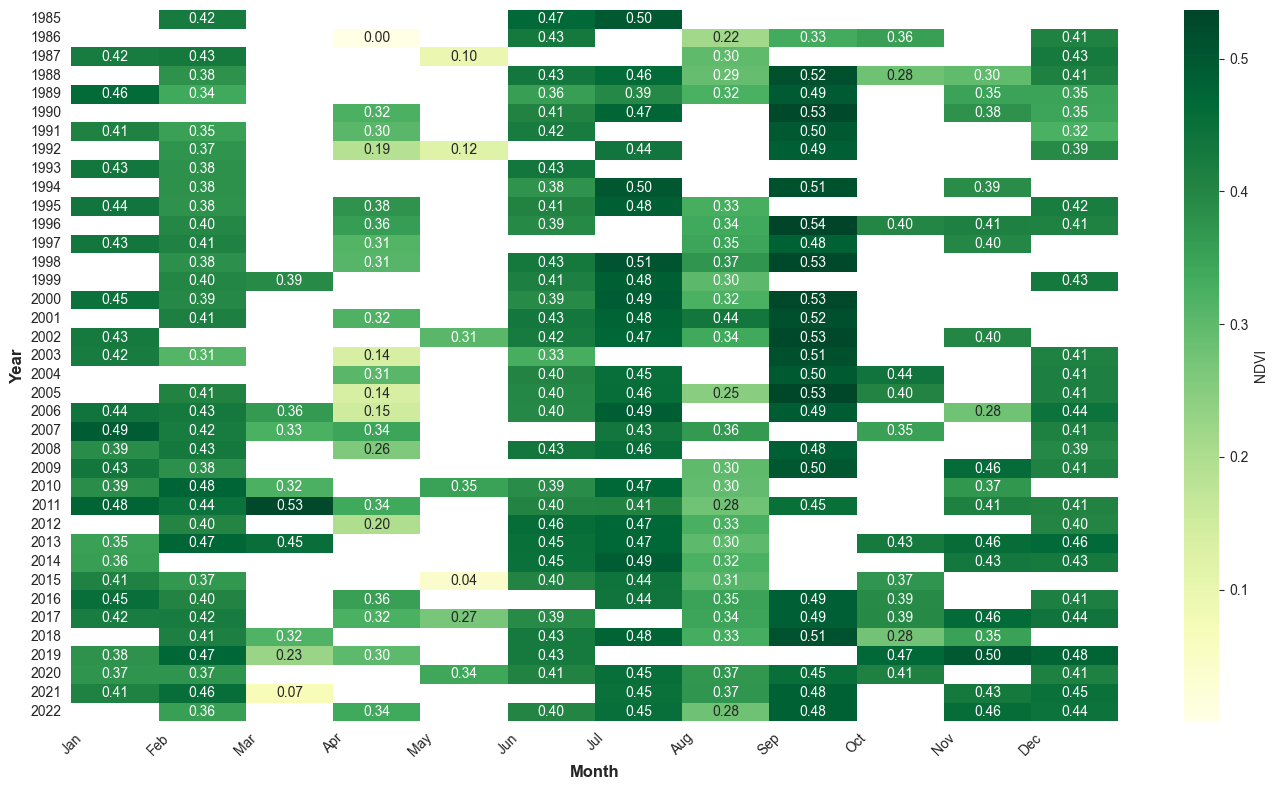

In [14]:
# Convert to datetime format if not already
selected_commune_index_NDVI_monthly["dtdate"] = pd.to_datetime(selected_commune_index_NDVI_monthly["dtdate"], errors="coerce")

# Set values before 1987 to NaN, but keep them in the dataset
#selected_commune_index_NDVI_monthly.loc[selected_commune_index_NDVI_monthly["dtdate"].dt.year < 1987, ["mean", "qual"]] = 0

# Apply filtering conditions (Fix the bracket placement)
selected_commune_index_NDVI_monthly_filtered = selected_commune_index_NDVI_monthly[
    ((selected_commune_index_NDVI_monthly["dtdate"].dt.year < 2003) & 
     (selected_commune_index_NDVI_monthly["qual"] >= 0.8)) |
    ((selected_commune_index_NDVI_monthly["dtdate"].dt.year >= 2003) & 
     (selected_commune_index_NDVI_monthly["qual"] >= 0.6))
]


# Ensure NaN values appear properly in heatmap
plot_missing_data_heatmap(selected_commune_index_NDVI_monthly_filtered, time_scale="monthly", name="results_data_heatmap_monthly_NDVI_filtered")
